## scikit-learn 패키지
- Python의 머신 러닝 라이브러이이다. `사이킷런`이라고 부르기도 한다. 
- 오픈소스로 공개되어 있으며, 개인, 비즈니스 관계없이 누구나 무료로 사용가능하다. 
- 딥러닝보다는 데이터 전처리 및 classical machine learning 알고리즘 (SVM, decision tree 기반 알고리즘 등)을 매우 편하게 이용할 수 있다. 
- 샘플 데이터 셋이 부속되어 있어 설치하여 바로 기계 학습을 시험해볼 수 있다.

In [1]:
import sklearn
from sklearn import datasets

- sklearn은 샘플데이터셋을 제공하는데 `load_boston`, `load_diabetes`, `load_digits`, `load_files`, `load_iris`, `load_breast_cancer`, `load_linnerud`, `load_sample_image`, `load_sample_images`, `load_svmlight_file`, `load_svmlight_files`, `load_wine` 등의 함수로 샘플 데이터 셋을 불러 올 수 있다.
- 데이터 셋에 대한 자세한 설명은 [scikit-learn 공식문서](https://scikit-learn.org/stable/datasets/toy_dataset.html)에서 확인 할 수 있다.

---
### Optical recognition of handwritten digits dataset
- `load_digits` 함수를 통해 샘플 데이터를 불러올 수 있다.
- UCI ML hand-written digits datasets의 복사본이다. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
- 손글씨로 입력된 숫자 데이터이고 주로 classification 학습을 위한 테스트 데이터 셋으로 활용된다.

In [2]:
digits = datasets.load_digits() #샘플 dataset을 불러오는 함수.
print(digits.images.shape) # 1797개의 8x8사이즈의 데이터이다.

(1797, 8, 8)


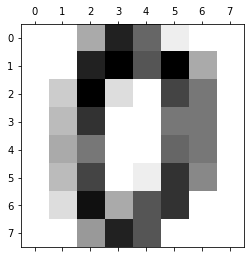

0


In [3]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.matshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()
print(digits.target[0])

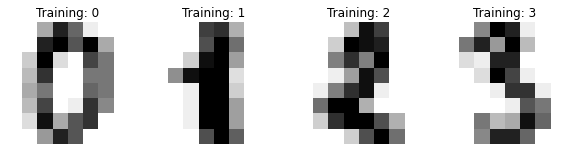

In [4]:
# 데이터 확인
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

#### Digits Classification 예제

In [5]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Support Vector Classifier
clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, # 학습데이터 이미지 (8x8사이즈)
    digits.target, # 이미지 label
    test_size=0.5, # 샘플데이터를 5 : 5 비율로 train, test 데이터로 나눔
    shuffle=False # 데이터를 섞지 않음
)

# train 데이터 학습
clf.fit(X_train, y_train)

# test 데이터로 예측함
predicted = clf.predict(X_test)

labal: 8
labal: 8
labal: 4
labal: 9


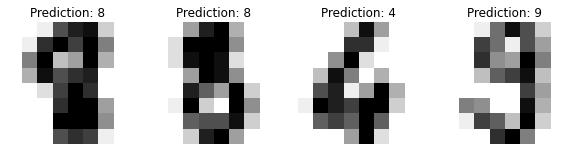

In [6]:
# 예측 결과 확인
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    print(f"labal: {label}")

In [7]:
# 성능 레포트
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n" # 실제 라벨과 예측값을 비교하여 레포트를 생성함
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




---
### Iris plants dataset
- `load_iris` 함수를 통해 샘플 데이터를 불러올 수 있다. 
- 붓꽃의 꽃받침과 꽃잎에 대한 높이와 너비에 대한 샘플 데이터 셋이고 주로 classification 학습을 위한 테스트 데이터 셋으로 활용된다.

In [12]:
iris = datasets.load_iris() #샘플 dataset을 불러오는 함수.
print(iris.data.shape, iris.feature_names) #150개의 데이터 (특징 4개)

(150, 4) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris.data[:5], iris.target[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [14]:
X = iris.data[:, :2]  # 4가지 특징 중 2가지 특징만 사용 ('sepal length (cm)', 'sepal width (cm)')
y = iris.target

# 2가지 특징 2차원 공간에 표현하여 이용하여 데이터 확인하기 위함.
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 # 최대 최소 값에 0.5씩의 여유를 줘서 예쁘게 표현
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 

print(f"x_min:{x_min}, x_max:{x_max}, y_min:{y_min}, y_max:{y_max}")
plt.figure(2, figsize=(8, 6))
plt.clf()

x_min:3.8, x_max:8.4, y_min:1.5, y_max:4.9


<Figure size 576x432 with 0 Axes>

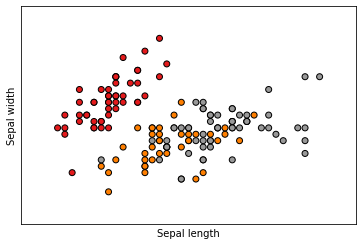

In [15]:
# scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length") # x축: sepal length (cm)
plt.ylabel("Sepal width") # y축: sepal width (cm)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

---
### Diabetes dataset
- `load_diabetes` 함수를 통해 샘플 데이터를 불러올 수 있다.
- 당뇨병에 대한 데이터 셋이다. 나이, 성별, 혈압 등의 데이터가 포함되어 있다. 주로 regression 학습을 위한 테스트 데이터 셋으로 활용된다.

In [21]:
biabets = datasets.load_diabetes() #샘플 dataset을 불러오는 함수.
print(biabets.data.shape, biabets.feature_names) #442개의 데이터 (특징 10개)

(442, 10) ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
